In [1]:
import numpy as np
import numpy.random as nprand
import matplotlib.pyplot as plt
import pandas as pd
import math as math

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif 
from sklearn.model_selection import cross_val_score

Data Loading and preprocessing:

In [2]:
# The original data = df
df = pd.read_csv('data.csv',
    header=None,
    index_col=False)

In [3]:
df.head(n=5)

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
0,adenoma_1,adenoma_1,adenoma_8,adenoma_8,adenoma_9,adenoma_9,adenoma_10,adenoma_10,adenoma_11,adenoma_11,...,serrated_5,serrated_5,serrated_6,serrated_6,serrated_7,serrated_7,serrated_8,serrated_8,serrated_9,serrated_9
1,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
2,1,2,2,1,2,1,1,2,2,1,...,1,2,1,2,1,2,2,1,1,2
3,138.12,127.99,80.415,90.896,106.16,147.09,148.73,126.05,109.13,129.7,...,114.59,86.424,163.68,71.638,180.11,136.55,96.852,157.81,93.569,95.543
4,1606.8,3377.9,1852.1,1904.3,1184.4,822.32,2412.5,4752.2,999.39,599.95,...,3014.5,3500.9,3253.1,1822.2,1198.5,1316.3,2071.3,2732.3,1163.6,2240.5


In [5]:
# removing the first row (name of the labels)
modified_df = df.iloc[1:701, :]

# change to numeric values
data = pd.to_numeric(modified_df.iloc[0])
for i in range(699):
    temp = pd.to_numeric(modified_df.iloc[i+1])
    l = [data, temp]
    data = pd.concat(l, axis=1)

In [6]:
# transpose the data to have columns as features
data = data.T.reset_index(drop=True).T

In [7]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
0,3.0,1.0,138.120,1606.8,0.003875,0.005880,0.005213,0.006935,0.007333,0.009580,...,0.013994,0.013532,0.013157,0.012743,0.012613,0.012422,0.012252,0.011377,0.011198,0.011131
1,3.0,2.0,127.990,3377.9,0.003564,0.005645,0.005891,0.008219,0.007325,0.009883,...,0.013994,0.013532,0.013157,0.012743,0.012613,0.012422,0.012252,0.011377,0.011198,0.011131
2,3.0,2.0,80.415,1852.1,0.004761,0.007558,0.005294,0.006863,0.006088,0.007074,...,0.003564,0.003380,0.003232,0.003200,0.003006,0.002985,0.002922,0.002631,0.002610,0.002531
3,3.0,1.0,90.896,1904.3,0.004147,0.006728,0.005061,0.006879,0.007948,0.009525,...,0.003564,0.003380,0.003232,0.003200,0.003006,0.002985,0.002922,0.002631,0.002610,0.002531
4,3.0,2.0,106.160,1184.4,0.005518,0.007645,0.007918,0.009513,0.010927,0.012717,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
# divide the nbi and wli images
wli = data.loc[(data[1] == 1)]
nbi = data.loc[(data[1] == 2)]

#nbi/wli[0] : label
#nbi/wli[1] : lighting type
#the rest of the parameters are extracted features

In [16]:
#remove constant(0) rows = modified_nbi/modified_wli
modified_nbi = nbi.loc[:, (nbi != 0).any(axis=0)]
modified_nbi = (((modified_nbi.reset_index(drop=True)).T).reset_index(drop=True)).T

modified_wli = wli.loc[:, (wli != 0).any(axis=0)]
modified_wli = (((modified_wli.reset_index(drop=True)).T).reset_index(drop=True)).T

In [17]:
modified_nbi.head(2)

,0,1,2,3,4,5,6,7,8,9,...,456,457,458,459,460,461,462,463,464,465
0,3.0,2.0,127.990,3377.9,0.003564,0.005645,0.005891,0.008219,0.007325,0.009883,...,0.013994,0.013532,0.013157,0.012743,0.012613,0.012422,0.012252,0.011377,0.011198,0.011131
1,3.0,2.0,80.415,1852.1,0.004761,0.007558,0.005294,0.006863,0.006088,0.007074,...,0.003564,0.003380,0.003232,0.003200,0.003006,0.002985,0.002922,0.002631,0.002610,0.002531


In [18]:
modified_wli.head(2)

,0,1,2,3,4,5,6,7,8,9,...,457,458,459,460,461,462,463,464,465,466
0,3.0,1.0,138.120,1606.8,0.003875,0.005880,0.005213,0.006935,0.007333,0.009580,...,0.013994,0.013532,0.013157,0.012743,0.012613,0.012422,0.012252,0.011377,0.011198,0.011131
1,3.0,1.0,90.896,1904.3,0.004147,0.006728,0.005061,0.006879,0.007948,0.009525,...,0.003564,0.003380,0.003232,0.003200,0.003006,0.002985,0.002922,0.002631,0.002610,0.002531


In [19]:
print("number of features: {}".format(len(modified_nbi)))

number of features: 76


In [20]:
#divide the modified_(nbi/wli) into X, y
#second column is constant (lighting type)
X_nbi = modified_nbi.iloc[:, 2:466]
X_nbi = X_nbi.T.reset_index(drop=True).T
y_nbi = modified_nbi.iloc[:, 0] 

X_wli = modified_wli.iloc[:, 2:466]
X_wli = X_wli.T.reset_index(drop=True).T
y_wli = modified_wli.iloc[:, 0] 

In [21]:
X_nbi.head(2)

,0,1,2,3,4,5,6,7,8,9,...,454,455,456,457,458,459,460,461,462,463
0,127.990,3377.9,0.003564,0.005645,0.005891,0.008219,0.007325,0.009883,0.007288,0.006699,...,0.013994,0.013532,0.013157,0.012743,0.012613,0.012422,0.012252,0.011377,0.011198,0.011131
1,80.415,1852.1,0.004761,0.007558,0.005294,0.006863,0.006088,0.007074,0.008361,0.009298,...,0.003564,0.003380,0.003232,0.003200,0.003006,0.002985,0.002922,0.002631,0.002610,0.002531


In [22]:
X_wli.head(2)

,0,1,2,3,4,5,6,7,8,9,...,454,455,456,457,458,459,460,461,462,463
0,138.120,1606.8,0.003875,0.005880,0.005213,0.006935,0.007333,0.009580,0.007380,0.006751,...,0.014486,0.013994,0.013532,0.013157,0.012743,0.012613,0.012422,0.012252,0.011377,0.011198
1,90.896,1904.3,0.004147,0.006728,0.005061,0.006879,0.007948,0.009525,0.010492,0.011988,...,0.003712,0.003564,0.003380,0.003232,0.003200,0.003006,0.002985,0.002922,0.002631,0.002610


In [23]:
y_nbi

0     3.0
1     3.0
2     3.0
3     3.0
4     3.0
     ... 
71    2.0
72    2.0
73    2.0
74    2.0
75    2.0
Name: 0, Length: 76, dtype: float64

### Binary classification: here, I have compared each class with the other two categories to see which feature works better for individual labels.

In [24]:
#New label (4) is set for the 2 and 3 labels. Then, label 1 is compared with label 4.
test1 = np.where(y_nbi == 2, 4, y_nbi)
test1 = np.where(test1 == 3, 4, test1)

In [31]:
#NBI
bestfeatures_nbi = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures_nbi.fit(X_nbi,test1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_nbi.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print k best features

     Specs      Score
238    238  51.581782
256    256  45.092477
263    263  44.033628
252    252  38.921506
234    234  38.603726


In [32]:
#Label 2 is compared with the rest
test2 = np.where(y_nbi == 1, 4, y_nbi)
test2 = np.where(test2 == 3, 4, test2)

In [33]:
bestfeatures_nbi = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures_nbi.fit(X_nbi,test2)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_nbi.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print k best features

     Specs      Score
188    188  21.030121
180    180  20.745597
184    184  19.416794
191    191  18.845571
190    190  18.559518


In [34]:
#Label 3 is compared with the rest
test3 = np.where(y_nbi == 1, 4, y_nbi)
test3 = np.where(test3 == 2, 4, test3)

In [35]:
bestfeatures_nbi = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures_nbi.fit(X_nbi,test3)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_nbi.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print k best features

     Specs      Score
256    256  17.292108
245    245  12.831329
254    254  10.146131
263    263  10.108831
234    234   9.863690


In [36]:
# Same procedure for the WLI images
test1 = np.where(y_wli == 2, 4, y_wli)
test1 = np.where(test1 == 3, 4, test1)

In [37]:
bestfeatures_wli = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures_wli.fit(X_wli,test1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_wli.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print k best features

     Specs      Score
239    239  45.545058
168    168  39.882352
253    253  37.840578
264    264  35.871765
188    188  35.312174


In [38]:
test2 = np.where(y_wli == 1, 4, y_wli)
test2 = np.where(test2 == 3, 4, test2)

In [39]:
bestfeatures_wli = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures_wli.fit(X_wli,test2)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_wli.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print k best features

     Specs      Score
203    203  17.200354
199    199  15.685007
184    184  15.357937
178    178  15.035246
191    191  13.719658


In [40]:
test3 = np.where(y_wli == 1, 4, y_wli)
test3 = np.where(test3 == 2, 4, test3)

In [41]:
bestfeatures_wli = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures_wli.fit(X_wli,test3)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_wli.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print k best features

     Specs      Score
257    257  14.146197
221    221  13.573112
216    216  13.132177
239    239  12.723362
242    242  12.075192


### Select K Best Features (in general):

In [43]:
#NBI
bestfeatures_nbi = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures_nbi.fit(X_nbi,y_nbi)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_nbi.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print k best features

     Specs      Score
238    238  27.355963
180    180  24.747039
188    188  24.417583
256    256  22.436829
263    263  22.144322
168    168  21.806719
191    191  20.842124
190    190  20.831293
172    172  20.653541
176    176  20.600428
184    184  20.125515
179    179  19.582276
252    252  19.565151
234    234  19.258522
169    169  18.391448
245    245  17.615931
173    173  16.617014
166    166  16.610502
178    178  16.553966
192    192  16.251152


In [41]:
#WLI
bestfeatures_wli = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures_wli.fit(X_wli,y_wli)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_wli.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print k best features

     Specs      Score
168    168  22.886028
239    239  22.524598
188    188  20.410938
199    199  19.266896
191    191  19.175634
179    179  19.030240
253    253  18.753236
173    173  18.654480
176    176  18.585692
172    172  18.268805
167    167  18.250036
178    178  17.933554
180    180  17.807960
190    190  17.749788
264    264  17.730026
249    249  17.729384
203    203  17.586091
187    187  17.390003
192    192  17.229799
169    169  17.223291


#### test_X_nbi = 6 best features from 3 different labels (considering binarry classifications)

In [44]:
test_X_nbi = X_nbi.iloc[:, [238, 256, 188, 180, 245, 254]]

## Density plots:

In [46]:
#WLI
wli_sub1=modified_wli.loc[modified_wli[0]==1]
wli_sub2=modified_wli.loc[modified_wli[0]==2]
wli_sub3=modified_wli.loc[modified_wli[0]==3]

wli_array,figs,axes=[],[],[]
for i in range(len(modified_wli.columns)-2):
    wli_array.append(pd.concat([wli_sub1.iloc[:, i+2], wli_sub2.iloc[:, i+2], wli_sub3.iloc[:, i+2]], axis=1))
    wli_array[i].columns=['Label = 1','Label = 2','Label = 3']

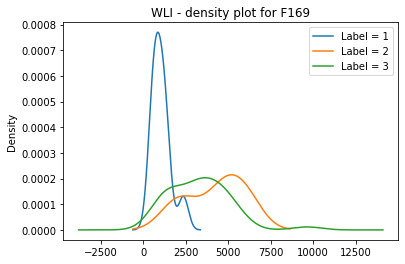

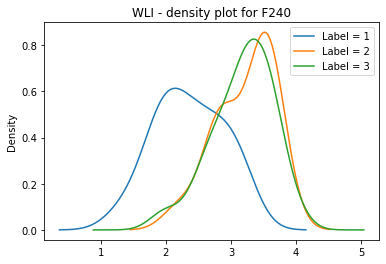

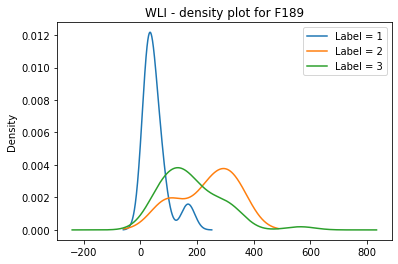

In [48]:
index=[168, 239, 188]
for i in index:
    wli_array[i].plot.density(title='WLI - density plot for F{}'.format(i + 1))

In [49]:
#NBI
nbi_sub1=modified_nbi.loc[modified_nbi[0]==1]
nbi_sub2=modified_nbi.loc[modified_nbi[0]==2]
nbi_sub3=modified_nbi.loc[modified_nbi[0]==3]

nbi_array,figs,axes=[],[],[]
for i in range(len(modified_nbi.columns)-2):
    nbi_array.append(pd.concat([nbi_sub1.iloc[:, i+2], nbi_sub2.iloc[:, i+2], nbi_sub3.iloc[:, i+2]], axis=1))
    nbi_array[i].columns=['Label = 1','Label = 2','Label = 3']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B0E9AA7A30>,
      dtype=object)

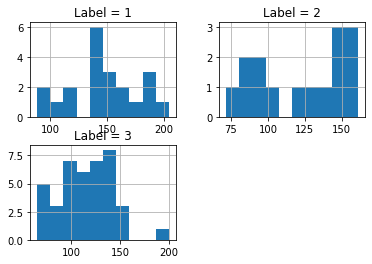

In [50]:
nbi_array[0].hist()

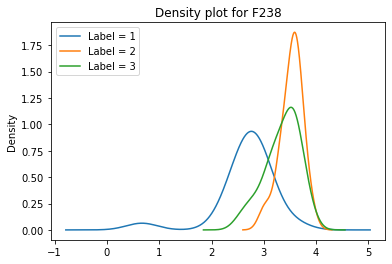

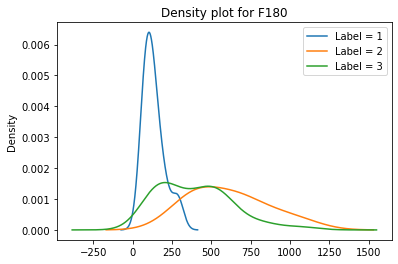

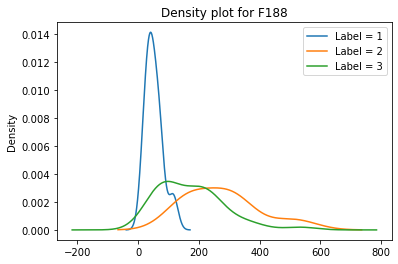

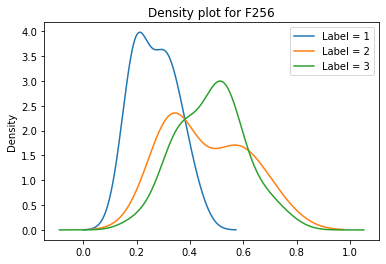

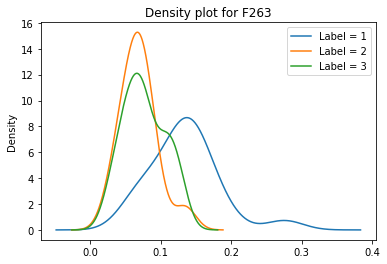

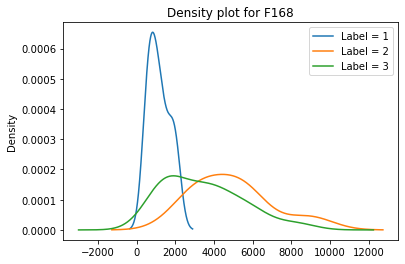

In [54]:
best6 = [238, 180, 188, 256, 263, 168]
for index in best6:
    nbi_array[index].plot.density(title='Density plot for F{}'.format(index))

### 6 Worst of X_nbi

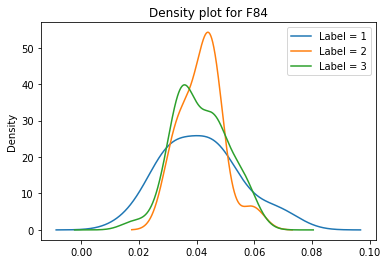

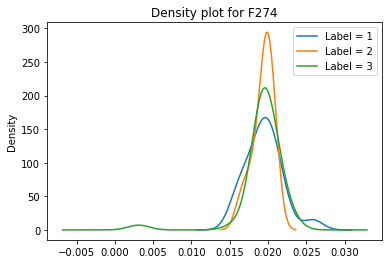

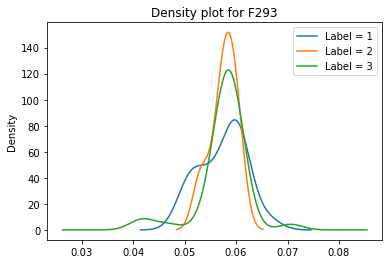

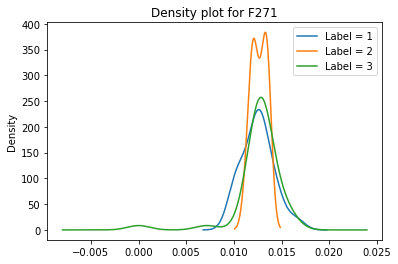

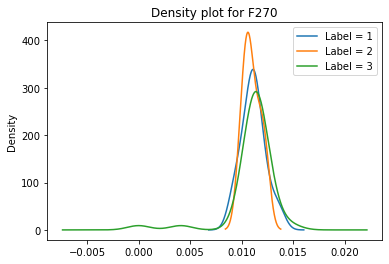

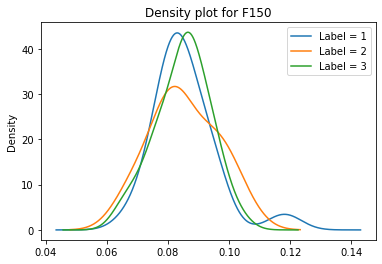

In [58]:
worst6d = X_nbi.iloc[:, [84, 274, 293, 271, 270, 150]]
worst6 = [84, 274, 293, 271, 270, 150]
for i in worst6:
    nbi_array[i].plot.density(title='Density plot for F{}'.format(i))

In [67]:
worst6d.describe()

,84,274,293,271,270,150
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,0.041462,0.019353,0.057533,0.012587,0.011065,0.085083
std,0.010073,0.002515,0.004336,0.002002,0.001796,0.009489
min,0.017688,0.003105,0.041074,0.000008,0.000008,0.064930
25%,0.034241,0.018887,0.056610,0.012102,0.010646,0.078515
50%,0.041903,0.019404,0.058263,0.012775,0.011257,0.085179
75%,0.046453,0.020599,0.059715,0.013247,0.011667,0.091244
max,0.070452,0.025862,0.070640,0.016499,0.014786,0.118100


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009850B10640>,
      dtype=object)

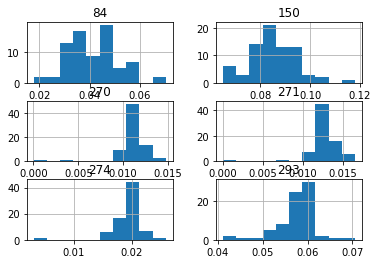

In [68]:
worst6d.hist()

### Remove low variance features:

In [59]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

X_nbi_variance = variance_threshold_selector(X_nbi, (.999 * (1 - .999)))
X_wli_variance = variance_threshold_selector(X_wli, (.999 * (1 - .999)))

In [60]:
X_nbi_variance.head(5)

,0,1,166,167,168,169,170,171,172,173,...,379,380,381,382,383,384,385,386,387,388
0,127.990,3377.90,1234.0,2912.0,4517.0,282.0,13275.0,291.0,324.0,381.0,...,0.142740,0.138500,0.136680,0.129850,0.127170,0.125710,0.121650,0.117610,0.112150,0.109880
1,80.415,1852.10,1192.0,2636.0,3295.0,216.0,7538.0,336.0,349.0,354.0,...,0.115030,0.110870,0.101000,0.097140,0.091928,0.089336,0.083839,0.074439,0.073525,0.071423
2,106.160,1184.40,1994.0,4530.0,5941.0,417.0,14423.0,564.0,509.0,490.0,...,0.002268,0.001495,0.001030,0.000921,0.000784,0.000493,0.000469,0.000337,0.000275,0.000228
3,126.050,4752.20,1074.0,2850.0,4062.0,250.0,12076.0,300.0,307.0,321.0,...,0.133960,0.125020,0.122880,0.120240,0.115400,0.113350,0.110490,0.104470,0.103560,0.103110
4,109.130,999.39,959.0,2240.0,3733.0,241.0,9637.0,245.0,279.0,330.0,...,0.083135,0.074174,0.070089,0.063503,0.056808,0.048250,0.045501,0.039743,0.036455,0.032964


### X_nbi_variance = removing low variance features = 116 features has been remained

In [19]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_nbi_variance, y_nbi)
dfscores = pd.DataFrame(fit.scores_)
X_nbi_variance = variance_threshold_selector(X_nbi, (.999 * (1 - .999)))
dfcolumns = pd.DataFrame(X_nbi_variance.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print k best features

    Specs      Score
64    238  27.355963
16    180  24.747039
24    188  24.417583
82    256  22.436829
89    263  22.144322
4     168  21.806719
27    191  20.842124
26    190  20.831293
8     172  20.653541
12    176  20.600428
20    184  20.125515
15    179  19.582276
78    252  19.565151
60    234  19.258522
5     169  18.391448
71    245  17.615931
9     173  16.617014
2     166  16.610502
14    178  16.553966
28    192  16.251152


#### selected20X_nbi_v = top 20 features after removing low variance features

In [61]:
selected20X_nbi_v = X_nbi.iloc[:, [238, 180, 188, 256, 263, 168,
                                   191, 190, 172, 176, 184, 179,
                                   252, 234, 169, 245, 173, 166, 178, 192]]

#### selected6X_nbi_v = top 6 in data

In [62]:
selected6X_nbi_v = X_nbi.iloc[:, [238, 180, 188, 256, 263, 168]]

<ipython-input-63-e33167917023>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  selected6X_nbi_v.hist(ax=ax)


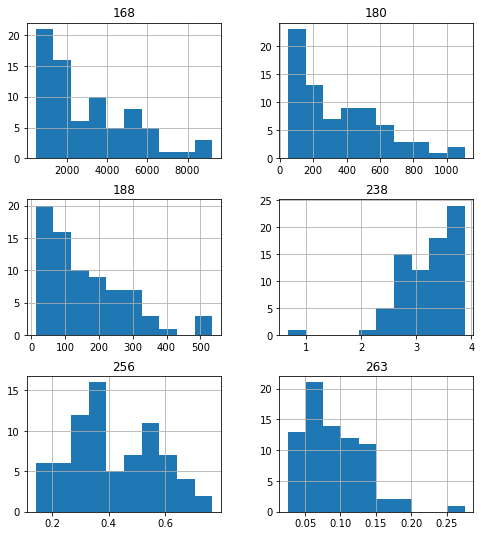

In [63]:
fig = plt.figure(figsize = (8,9))
ax = fig.gca()
selected6X_nbi_v.hist(ax=ax)
plt.show()

In [64]:
selected6X_nbi_v.describe()

,238,180,188,256,263,168
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,3.200555,364.210526,159.381579,0.417039,0.090989,3092.447368
std,0.505570,258.717623,122.544138,0.150164,0.043708,2171.647709
min,0.668560,49.000000,13.000000,0.142730,0.025924,462.000000
25%,2.905600,145.250000,63.500000,0.311515,0.059737,1296.500000
50%,3.304200,308.500000,130.000000,0.388410,0.079750,2466.500000
75%,3.577800,519.000000,228.000000,0.533200,0.117460,4441.250000
max,3.875000,1106.000000,535.000000,0.766870,0.275320,9227.000000


## Recursive feature elimination

### Random forest. 1.

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

#randomforst using X_nbi_variance as input data
model = RFECV(RandomForestClassifier(), scoring='accuracy')
model.fit(X_nbi_variance, y_nbi)

In [25]:
print("Optimal number of features: {}".format(model.n_features_))

Optimal number of features: 33


In [169]:
model.support_

array([ True, False,  True,  True, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False,  True,  True, False,  True,
        True, False,  True, False, False, False,  True, False, False,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [26]:
bestforest_X_nbi_v = X_nbi_variance[X_nbi_variance.columns[model.get_support(indices=True)]]
bestforest_X_nbi_v.head(5)

,0,166,168,170,172,173,180,184,188,191,...,252,253,254,255,256,258,259,261,263,264
1,127.990,1234.0,4517.0,13275.0,324.0,381.0,545.0,554.0,234.0,501.0,...,0.040217,0.79440,97.913,50.985,0.52072,2.6022,0.108060,0.55177,0.050691,0.79627
2,80.415,1192.0,3295.0,7538.0,349.0,354.0,517.0,628.0,207.0,478.0,...,0.088054,0.86636,57.655,33.595,0.58269,2.9911,0.179080,0.67862,0.109230,0.86569
4,106.160,1994.0,5941.0,14423.0,509.0,490.0,818.0,977.0,349.0,815.0,...,0.105120,0.85285,76.973,30.155,0.39177,4.8585,0.210790,0.83878,0.128200,0.85257
7,126.050,1074.0,4062.0,12076.0,307.0,321.0,435.0,540.0,195.0,432.0,...,0.039566,0.86593,97.407,56.964,0.58480,1.7798,0.086192,0.30082,0.050775,0.86701
8,109.130,959.0,3733.0,9637.0,279.0,330.0,464.0,475.0,204.0,410.0,...,0.100740,0.86298,82.827,28.916,0.34911,3.9117,0.218270,0.35482,0.129190,0.86081


### Random Forest. 2.

In [75]:
#randomforst using selected20X_nbi_v as input data
model = RFECV(RandomForestClassifier(), scoring='accuracy')
model.fit(selected20X_nbi_v, y_nbi)

RFECV(estimator=RandomForestClassifier(), scoring='accuracy')

In [76]:
print("Optimal number of features: {}".format(model.n_features_))

Optimal number of features: 9


In [77]:
bestforest_X_nbi_v_20 = selected20X_nbi_v[selected20X_nbi_v.columns[model.get_support(indices=True)]]
bestforest_X_nbi_v_20.head(5)

,238,180,188,256,263,190,252,234,166
0,3.5778,545.0,234.0,0.52072,0.050691,490.0,0.040217,0.43163,1234.0
1,3.3750,517.0,207.0,0.58269,0.109230,543.0,0.088054,0.48512,1192.0
2,3.1494,818.0,349.0,0.39177,0.128200,817.0,0.105120,0.29150,1994.0
3,3.0306,435.0,195.0,0.58480,0.050775,433.0,0.039566,0.50987,1074.0
4,3.0244,464.0,204.0,0.34911,0.129190,389.0,0.100740,0.28086,959.0


In [31]:
bestforest_X_nbi_v_20 = X_nbi.iloc[:, [238, 180, 188, 256, 263, 190, 252, 234, 166]]

### SVC

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification

svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(selected20X_nbi_v, y_nbi)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=SVC(kernel='linear'), scoring='accuracy')

In [37]:
print("Optimal number of features: {}".format(rfecv.n_features_))

Optimal number of features: 9


In [38]:
selectfrommodel_20 = selected20X_nbi_v[selected20X_nbi_v.columns[rfecv.get_support(indices=True)]]
selectfrommodel_20.head(5)

,238,188,256,168,190,176,234,245,178
1,3.5778,234.0,0.52072,4517.0,490.0,451.0,0.43163,0.45838,422.0
2,3.3750,207.0,0.58269,3295.0,543.0,438.0,0.48512,0.56557,341.0
4,3.1494,349.0,0.39177,5941.0,817.0,706.0,0.29150,0.33821,607.0
7,3.0306,195.0,0.58480,4062.0,433.0,477.0,0.50987,0.56420,504.0
8,3.0244,204.0,0.34911,3733.0,389.0,367.0,0.28086,0.28995,319.0


In [39]:
svc_selected20X_nbi_v = X_nbi.iloc[:, [238, 188, 256, 168, 190, 176, 234, 245, 178]]

### one best feature:

In [33]:
main_feature = X_nbi.iloc[:, [238]]

### select one best feature for each label individually

In [34]:
test_X_nbi_2 = X_nbi.iloc[:, [238, 188, 256]]

### select mutual features of "best 6 features in general" and "best 6 features considering binary classification"

In [ ]:
mutual_67 = X_nbi.iloc[:, [238, 256, 188, 180]]

### List of all the extracted features

In [79]:
dataframes = [X_nbi,
              X_nbi_variance,
              bestforest_X_nbi_v,
              selected20X_nbi_v,
              bestforest_X_nbi_v_20,
              selected6X_nbi_v,
              test_X_nbi,
              test_X_nbi_2,
              mutual_67,
              main_feature,
              svc_selected20X_nbi_v]
names = ['NBI: 466F',
        'Remove low variance: 116F',
        'bestforest from 116F: 30F',
        'Top 20 from 116F',
        'bestforest from top 20',
        'Top 6 from 116F',
        'Top 6 based on labels',
        'Top 3 based on labels',
        'Top 4 (same in 6-7)',
        'one best feature',
        'new data']

**Classifiers**

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### Naive Bayes Classifier:

In [42]:
from prettytable import PrettyTable

In [43]:
#Naive Bayes Classifier
clf1 = GaussianNB()

In [44]:
table = PrettyTable(field_names=['Dataframe', 'Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Mean'])

for i, df in enumerate(dataframes):
    scores = cross_val_score(clf1, df, y_nbi, cv=5)
    mean = round(scores.mean(), 2)
    table.add_row([names[i], round(scores[0], 2), round(scores[1], 2), round(scores[2], 2), round(scores[3], 2), round(scores[4], 2), mean])
    
print(table)

+---------------------------+------+------+------+------+------+------+
|         Dataframe         | Run1 | Run2 | Run3 | Run4 | Run5 | Mean |
+---------------------------+------+------+------+------+------+------+
|         NBI: 466F         | 0.56 | 0.47 | 0.47 | 0.47 | 0.4  | 0.47 |
| Remove low variance: 116F | 0.56 | 0.47 | 0.47 | 0.47 | 0.4  | 0.47 |
| bestforest from 116F: 30F | 0.75 | 0.67 | 0.47 | 0.27 | 0.4  | 0.51 |
|      Top 20 from 116F     | 0.62 | 0.6  | 0.47 | 0.47 | 0.4  | 0.51 |
|   bestforest from top 20  | 0.75 | 0.73 | 0.87 | 0.47 | 0.33 | 0.63 |
|      Top 6 from 116F      | 0.69 | 0.73 | 0.6  | 0.53 | 0.47 | 0.6  |
|   Top 6 based on labels   | 0.75 | 0.67 | 0.8  | 0.67 | 0.4  | 0.66 |
|   Top 3 based on labels   | 0.81 | 0.73 | 0.8  | 0.73 | 0.4  | 0.7  |
|    Top 4 (same in 6-7)    | 0.69 | 0.67 | 0.67 | 0.6  | 0.4  | 0.6  |
|      one best feature     | 0.69 | 0.6  | 0.73 | 0.93 | 0.53 | 0.7  |
|          new data         | 0.62 | 0.6  | 0.53 | 0.33 | 0.4  |

### K Neighbors Classifier:

In [65]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
k_range = list(range(1,15))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
for df in dataframes:
    grid.fit(df,y_nbi)
    print (grid.best_params_)

{'n_neighbors': 7, 'weights': 'uniform'}
{'n_neighbors': 7, 'weights': 'uniform'}
{'n_neighbors': 9, 'weights': 'distance'}
{'n_neighbors': 13, 'weights': 'uniform'}
{'n_neighbors': 11, 'weights': 'distance'}
{'n_neighbors': 11, 'weights': 'uniform'}
{'n_neighbors': 6, 'weights': 'uniform'}
{'n_neighbors': 9, 'weights': 'uniform'}
{'n_neighbors': 6, 'weights': 'uniform'}
{'n_neighbors': 9, 'weights': 'uniform'}
{'n_neighbors': 11, 'weights': 'uniform'}


In [66]:
table = PrettyTable(field_names=['Dataframe', 'Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Mean'])
N = [7, 7, 9, 13, 11, 11, 6, 9, 6, 9, 11]
for i, df in enumerate(dataframes):
    clf2_2 = KNeighborsClassifier(n_neighbors=N[i])
    scores = cross_val_score(clf2_2, df, y_nbi, cv=5)
    mean = round(scores.mean(), 2)
    table.add_row([names[i], round(scores[0], 2), round(scores[1], 2), round(scores[2], 2), round(scores[3], 2), round(scores[4], 2), mean])
    
print(table)

+---------------------------+------+------+------+------+------+------+
|         Dataframe         | Run1 | Run2 | Run3 | Run4 | Run5 | Mean |
+---------------------------+------+------+------+------+------+------+
|         NBI: 466F         | 0.56 | 0.67 | 0.53 | 0.4  | 0.47 | 0.53 |
| Remove low variance: 116F | 0.56 | 0.67 | 0.53 | 0.4  | 0.47 | 0.53 |
| bestforest from 116F: 30F | 0.62 | 0.6  | 0.6  | 0.53 | 0.53 | 0.58 |
|      Top 20 from 116F     | 0.62 | 0.67 | 0.6  | 0.53 | 0.4  | 0.56 |
|   bestforest from top 20  | 0.69 | 0.67 | 0.67 | 0.6  | 0.47 | 0.62 |
|      Top 6 from 116F      | 0.62 | 0.6  | 0.6  | 0.53 | 0.33 | 0.54 |
|   Top 6 based on labels   | 0.56 | 0.8  | 0.6  | 0.6  | 0.53 | 0.62 |
|   Top 3 based on labels   | 0.69 | 0.8  | 0.67 | 0.53 | 0.6  | 0.66 |
|    Top 4 (same in 6-7)    | 0.56 | 0.8  | 0.6  | 0.6  | 0.53 | 0.62 |
|      one best feature     | 0.62 | 0.67 | 0.6  | 0.8  | 0.53 | 0.64 |
|          new data         | 0.62 | 0.6  | 0.6  | 0.53 | 0.33 |

In [279]:
#N=3
table = PrettyTable(field_names=['Dataframe', 'Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Mean'])

for i, df in enumerate(dataframes):
    clf2 = KNeighborsClassifier(n_neighbors=3)
    scores = cross_val_score(clf2, df, y_nbi, cv=5)
    mean = round(scores.mean(), 2)
    table.add_row([names[i], round(scores[0], 2), round(scores[1], 2), round(scores[2], 2), round(scores[3], 2), round(scores[4], 2), mean])
    
print(table)

+---------------------------+------+------+------+------+------+------+
|         Dataframe         | Run1 | Run2 | Run3 | Run4 | Run5 | Mean |
+---------------------------+------+------+------+------+------+------+
|         NBI: 466F         | 0.5  | 0.53 | 0.53 | 0.47 | 0.4  | 0.49 |
| Remove low variance: 116F | 0.5  | 0.53 | 0.53 | 0.47 | 0.4  | 0.49 |
| bestforest from 116F: 30F | 0.5  | 0.73 | 0.53 | 0.67 | 0.6  | 0.61 |
|      Top 20 from 116F     | 0.5  | 0.47 | 0.6  | 0.6  | 0.4  | 0.51 |
|   bestforest from top 20  | 0.5  | 0.6  | 0.6  | 0.6  | 0.47 | 0.55 |
|      Top 6 from 116F      | 0.38 | 0.53 | 0.47 | 0.53 | 0.47 | 0.48 |
|   Top 6 based on labels   | 0.62 | 0.6  | 0.6  | 0.67 | 0.47 | 0.59 |
|   Top 3 based on labels   | 0.44 | 0.4  | 0.6  | 0.67 | 0.53 | 0.53 |
|    Top 4 (same in 6-7)    | 0.5  | 0.6  | 0.6  | 0.6  | 0.6  | 0.58 |
|      one best feature     | 0.62 | 0.6  | 0.6  | 0.67 | 0.47 | 0.59 |
|          new data         | 0.44 | 0.4  | 0.53 | 0.47 | 0.47 |

### Decision Tree Classifier:

In [191]:
clf3 = DecisionTreeClassifier()

In [280]:
table = PrettyTable(field_names=['Dataframe', 'Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Mean'])

for i, df in enumerate(dataframes):
    scores = cross_val_score(clf3, df, y_nbi, cv=5)
    mean = round(scores.mean(), 2)
    table.add_row([names[i], round(scores[0], 2), round(scores[1], 2), round(scores[2], 2), round(scores[3], 2), round(scores[4], 2), mean])
    
print(table)

+---------------------------+------+------+------+------+------+------+
|         Dataframe         | Run1 | Run2 | Run3 | Run4 | Run5 | Mean |
+---------------------------+------+------+------+------+------+------+
|         NBI: 466F         | 0.56 | 0.4  | 0.73 | 0.4  | 0.33 | 0.49 |
| Remove low variance: 116F | 0.56 | 0.73 | 0.73 | 0.67 | 0.33 | 0.61 |
| bestforest from 116F: 30F | 0.69 | 0.8  | 0.87 | 0.53 | 0.4  | 0.66 |
|      Top 20 from 116F     | 0.69 | 0.67 | 0.67 | 0.4  | 0.6  | 0.6  |
|   bestforest from top 20  | 0.62 | 0.6  | 0.67 | 0.73 | 0.6  | 0.64 |
|      Top 6 from 116F      | 0.62 | 0.67 | 0.67 | 0.6  | 0.67 | 0.64 |
|   Top 6 based on labels   | 0.5  | 0.33 | 0.53 | 0.47 | 0.47 | 0.46 |
|   Top 3 based on labels   | 0.69 | 0.6  | 0.87 | 0.67 | 0.6  | 0.68 |
|    Top 4 (same in 6-7)    | 0.69 | 0.67 | 0.67 | 0.67 | 0.67 | 0.67 |
|      one best feature     | 0.5  | 0.33 | 0.53 | 0.47 | 0.47 | 0.46 |
|          new data         | 0.44 | 0.67 | 0.73 | 0.47 | 0.53 |

### Support Vector Machine

In [281]:
clf4 = SVC(kernel='rbf', probability=True)

table = PrettyTable(field_names=['Dataframe', 'Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Mean'])

for i, df in enumerate(dataframes):
    scores = cross_val_score(clf2, df, y_nbi, cv=5)
    mean = round(scores.mean(), 2)
    table.add_row([names[i], round(scores[0], 2), round(scores[1], 2), round(scores[2], 2), round(scores[3], 2), round(scores[4], 2), mean])
    
print(table)

+---------------------------+------+------+------+------+------+------+
|         Dataframe         | Run1 | Run2 | Run3 | Run4 | Run5 | Mean |
+---------------------------+------+------+------+------+------+------+
|         NBI: 466F         | 0.5  | 0.53 | 0.53 | 0.47 | 0.4  | 0.49 |
| Remove low variance: 116F | 0.5  | 0.53 | 0.53 | 0.47 | 0.4  | 0.49 |
| bestforest from 116F: 30F | 0.5  | 0.73 | 0.53 | 0.67 | 0.6  | 0.61 |
|      Top 20 from 116F     | 0.5  | 0.47 | 0.6  | 0.6  | 0.4  | 0.51 |
|   bestforest from top 20  | 0.5  | 0.6  | 0.6  | 0.6  | 0.47 | 0.55 |
|      Top 6 from 116F      | 0.38 | 0.53 | 0.47 | 0.53 | 0.47 | 0.48 |
|   Top 6 based on labels   | 0.62 | 0.6  | 0.6  | 0.67 | 0.47 | 0.59 |
|   Top 3 based on labels   | 0.44 | 0.4  | 0.6  | 0.67 | 0.53 | 0.53 |
|    Top 4 (same in 6-7)    | 0.5  | 0.6  | 0.6  | 0.6  | 0.6  | 0.58 |
|      one best feature     | 0.62 | 0.6  | 0.6  | 0.67 | 0.47 | 0.59 |
|          new data         | 0.44 | 0.4  | 0.53 | 0.47 | 0.47 |

In [112]:
clf4 = SVC(kernel='linear', probability=True)

table = PrettyTable(field_names=['Dataframe', 'Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Mean'])

for i, df in enumerate(dataframes):
    scores = cross_val_score(clf4, df, y_nbi, cv=5)
    mean = round(scores.mean(), 2)
    table.add_row([names[i], round(scores[0], 2), round(scores[1], 2), round(scores[2], 2), round(scores[3], 2), round(scores[4], 2), mean])
    
print(table)

+---------------------------+------+------+------+------+------+------+
|         Dataframe         | Run1 | Run2 | Run3 | Run4 | Run5 | Mean |
+---------------------------+------+------+------+------+------+------+
|         NBI: 466F         | 0.5  | 0.67 | 0.47 | 0.6  | 0.47 | 0.54 |
| Remove low variance: 116F | 0.5  | 0.67 | 0.47 | 0.6  | 0.47 | 0.54 |
| bestforest from 116F: 30F | 0.5  | 0.53 | 0.73 | 0.6  | 0.6  | 0.59 |
|      Top 20 from 116F     | 0.81 | 0.47 | 0.53 | 0.4  | 0.6  | 0.56 |
|   bestforest from top 20  | 0.5  | 0.6  | 0.53 | 0.53 | 0.4  | 0.51 |
|      Top 6 from 116F      | 0.56 | 0.6  | 0.67 | 0.67 | 0.53 | 0.61 |
|   Top 6 based on labels   | 0.69 | 0.53 | 0.67 | 0.67 | 0.47 | 0.6  |
|   Top 3 based on labels   | 0.69 | 0.67 | 0.6  | 0.6  | 0.47 | 0.6  |
|    Top 4 (same in 6-7)    | 0.69 | 0.47 | 0.67 | 0.6  | 0.47 | 0.58 |
|      one best feature     | 0.69 | 0.6  | 0.73 | 0.8  | 0.53 | 0.67 |
|          new data         | 0.69 | 0.8  | 0.87 | 0.67 | 0.53 |